In [132]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D, GRU # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
from keras import metrics
from keras.utils import plot_model
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import numpy.ma as ma
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

import seaborn as sns
#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [133]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df=df.dropna(axis=0, how='all')#drop full nan rows
df

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.9146 35.4470          0.0    -13.5180    0.747460      5.0862   
          35.4490          0.0    -13.6410    0.063185      4.4150   
          35.4510          0.0    -13.6300    0.400600      4.7172   
          35.4530          0.0    -13.5690   -0.500240      4.0645   
          35.4550          0.0    -13.5060   -1.107300      2.9022   
...                        ...         ...         ...         ...   
-117.6414 37.6236          0.0      4.8278   -1.306500         NaN   
          37.6256          0.0      4.8698   -1.213700         NaN   
          37.6276          0.0      4.8693   -1.189300         NaN   
          37.6296          0.0      4.8277   -1.190600         NaN   
          37.6316          0.0      4.8729   -1.120000         NaN   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.9146 35.4470      -1.9668     1.29470     -5.1067     0.87440   
          35.4490      -2.5803     0.74781     -5.7172     0.19724   
          35.4510      -2.3308     0.99271     -5.4875     0.39402   
          35.4530      -2.8942     0.21585     -6.1191     0.00391   
          35.4550      -4.1777    -1.13510     -7.3587    -1.35330   
...                        ...         ...         ...         ...   
-117.6414 37.6236      -4.1515    -1.99990      9.9914    -3.10550   
          37.6256      -4.1588    -1.73720     10.4130    -2.95840   
          37.6276      -4.1632    -1.71070     10.4830    -2.93180   
          37.6296      -4.1240    -1.89490     10.1870    -3.01790   
          37.6316      -4.1457    -1.70330     10.5180    -2.92690   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.9146 35.4470     -5.15400     2.55900  ...     -6.5221     -3.3514   
          35.4490     -5.74300     1.93390  ...     -7.3692     -4.3340   
          35.4510     -5.48650     2.15280  ...     -6.8486     -4.0115   
          35.4530     -5.82860     1.83380  ...     -5.6745     -3.0299   
          35.4550     -7.29700     0.46061  ...     -7.9927     -5.4295   
...                        ...         ...  ...         ...         ...   
-117.6414 37.6236     -0.32799     6.98990  ...      8.5800     11.3410   
          37.6256     -0.33838     7.34020  ...      9.2515     11.9960   
          37.6276     -0.34454     7.39780  ...      8.8321     11.5700   
          37.6296     -0.31614     7.12450  ...     10.3320     13.0730   
          37.6316     -0.33153     7.38390  ...      9.3376     12.0530   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.9146 35.4470      -4.1662     -6.3219     -11.361     -9.6235   
          35.4490      -5.1182     -7.1733     -12.311    -10.5640   
          35.4510      -4.7786     -6.7119     -11.929    -10.1480   
          35.4530      -3.7675     -5.5943     -10.838     -9.0944   
          35.4550      -6.2580     -7.9820     -13.136    -11.3610   
...                        ...         ...         ...         ...   
-117.6414 37.6236       5.5704      7.6113      17.002      9.6014   
          37.6256       6.0621      8.2387      17.526      9.5942   
          37.6276       5.5897      7.8226      17.066      9.2927   
          37.6296       7.2137      9.3699      18.582     10.8610   
          37.6316       6.0863      8.3323      17.499      9.8190   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.9146 35.4470      -4.9249     -3.5976     -5.1346     -4.4193  
          35.4490      -5.7429     -4.3201     -5.8205     -5.0144  
          35.4510      -5.1576     

In [134]:
df2=pd.read_csv('InSAR_data_south/displacement/groundwater.csv')
df2=df2.set_index([df2.columns[0],df2.columns[1]])
df2.columns=pd.to_datetime(df2.columns, format='%Y-%m-%d')

In [135]:
# dftest2=df.iloc[df.index.get_level_values('Longitude')< -119.6 ]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -120.1]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 35.7]
# dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.6]
dftest2=df.iloc[df.index.get_level_values('Longitude')< -118.9 ]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -120.1]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 35.5]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.6]

dftest2

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.0988 35.5011          0.0     -8.3584    -0.36099     0.57045   
          35.5031          0.0     -8.3310    -0.31206     0.60266   
          35.5051          0.0     -8.3098    -0.26339     0.63216   
          35.5071          0.0     -8.3045    -0.18737     0.71828   
          35.5091          0.0     -8.3047    -0.24360     0.69493   
...                        ...         ...         ...         ...   
-118.9011 36.5853          0.0      2.2178    -2.24420    -1.41080   
          36.5873          0.0      2.1766    -2.19460    -1.54720   
          36.5893          0.0      2.1897    -2.11230    -1.46870   
          36.5913          0.0      2.1304    -2.23090    -1.48930   
          36.5933          0.0      2.0630    -1.84910    -1.43740   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.0988 35.5011      -2.6961    -0.31501   -2.128500    -0.48435   
          35.5031      -2.6702    -0.28158   -2.079100    -0.43313   
          35.5051      -2.7013    -0.28257   -2.065900    -0.41499   
          35.5071      -2.6423    -0.23160   -2.061400    -0.37985   
          35.5091      -2.6431    -0.24626   -2.099300    -0.40524   
...                        ...         ...         ...         ...   
-118.9011 36.5853      -3.5791    -3.30320   -0.059585    -2.41020   
          36.5873      -3.8488    -3.48780   -0.372920    -2.65020   
          36.5893      -3.7266    -3.47520   -0.053699    -2.60880   
          36.5913      -3.8413    -3.13860   -0.221430    -2.35660   
          36.5933      -3.9668    -2.89540    0.176890    -2.08900   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.0988 35.5011     -1.15030     1.04960  ...     -3.1451    -1.16700   
          35.5031     -1.09850     1.07100  ...     -3.0424    -1.10930   
          35.5051     -1.09850     1.03520  ...     -2.7376    -0.86194   
          35.5071     -1.07470     1.02110  ...     -2.5656    -0.76755   
          35.5091     -1.10450     0.99037  ...     -2.6439    -0.91686   
...                        ...         ...  ...         ...         ...   
-118.9011 36.5853     -0.84200    -1.34130  ...     -1.1654    -0.88490   
          36.5873     -1.00740    -1.44510  ...     -1.5873    -1.11390   
          36.5893     -0.86900    -1.22850  ...     -1.9829    -1.31150   
          36.5913     -0.59387    -1.18200  ...     -1.9222    -1.05770   
          36.5933     -0.14639    -0.57924  ...     -0.8982     0.23505   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.0988 35.5011     -2.05870    -2.53620    -2.38390    -5.47380   
          35.5031     -1.99490    -2.43110    -2.28730    -5.42430   
          35.5051     -1.75380    -2.11850    -2.01050    -5.21350   
          35.5071     -1.63560    -1.94910    -1.87170    -5.05250   
          35.5091     -1.76240    -2.01720    -1.99360    -5.22170   
...                        ...         ...         ...         ...   
-118.9011 36.5853     -0.82388    -0.91889     0.75434    -1.94300   
          36.5873     -1.24080    -1.33690     0.50831    -2.22680   
          36.5893     -1.60730    -1.74890     0.25247    -2.54740   
          36.5913     -1.60310    -1.77110     0.64936    -1.86160   
          36.5933     -0.62815    -0.81048     1.95450    -0.93488   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.0988 35.5011      0.18115    0.093971   -0.031722   -0.004254  
          35.5031      0.23634    0.179500    0.048150    0.101180  
          35.5051      0.46731    0

In [136]:
for row in range(len(dftest2.index)-1,-1,-1):
    if dftest2.index[row] not in df2.index:
            dftest2.drop(index=dftest2.index[row], inplace=True)
dftest2

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.0988 35.6491          0.0    -8.12860    1.596200     2.20610   
          35.8171          0.0    -7.44130    1.611600     2.86700   
          35.9332          0.0    -6.84590    1.622100     2.63640   
          36.1012          0.0    -6.03120    1.666400     3.78230   
-120.0968 35.9852          0.0    -6.84490    1.344800     3.24930   
...                        ...         ...         ...         ...   
-118.9351 35.9912          0.0     1.31960   -0.454550    -1.12980   
-118.9331 35.8431          0.0    -0.27523    0.340730     0.11561   
-118.9311 35.6111          0.0    -2.60280    0.000017     0.94402   
          36.0432          0.0     1.67880   -0.808910    -1.57380   
-118.9271 35.7791          0.0    -0.74982    0.704870     0.91393   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.0988 35.6491     -1.02220      2.8665   -0.518000     1.43890   
          35.8171     -0.63183      4.0240    0.345960     2.38370   
          35.9332     -0.67816      4.3306    0.549880     2.15820   
          36.1012     -0.79018      4.0454    0.072619    -0.48999   
-120.0968 35.9852     -0.42671      4.4830    1.098100     1.90060   
...                        ...         ...         ...         ...   
-118.9351 35.9912     -2.19600     -2.2949    0.732390    -2.64910   
-118.9331 35.8431     -1.89770     -1.7240    1.244300    -2.65080   
-118.9311 35.6111     -2.10420     -1.8717    0.510950    -2.71470   
          36.0432     -1.46080     -2.8152    0.054982    -2.94200   
-118.9271 35.7791     -2.01520     -1.4199    1.315100    -2.26120   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.0988 35.6491     -0.11570    2.294800  ...      1.9885      3.5825   
          35.8171      0.66564    2.423800  ...      3.0516      4.8731   
          35.9332      0.98423    2.142100  ...      3.0299      4.8895   
          36.1012     -0.17051   -1.213200  ...     -7.1565     -4.7987   
-120.0968 35.9852      1.26060    1.822800  ...      3.2647      5.2447   
...                        ...         ...  ...         ...         ...   
-118.9351 35.9912     -0.57953   -0.463840  ...      3.3119      2.4877   
-118.9331 35.8431      0.44136    0.072182  ...      5.3406      4.6145   
-118.9311 35.6111      0.42639    0.334300  ...      4.6175      4.2846   
          36.0432     -1.33580   -1.282900  ...      2.8628      1.8351   
-118.9271 35.7791      0.90483    0.531310  ...      6.6669      6.1738   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.0988 35.6491       2.0509      2.8094      1.7238   -0.171410   
          35.8171       3.1897      4.3736      2.6908    0.041718   
          35.9332       3.2825      4.5129      2.6161    0.220740   
          36.1012      -6.5900     -5.6185     -8.0356   -8.517900   
-120.0968 35.9852       3.6587      4.7573      2.1463    1.406500   
...                        ...         ...         ...         ...   
-118.9351 35.9912       3.7906      3.6429      3.8131    2.701500   
-118.9331 35.8431       5.8431      5.6430      5.8181    5.778600   
-118.9311 35.6111       5.3261      5.0863      5.6278    4.180500   
          36.0432       3.5058      3.3816      3.2020    2.793300   
-118.9271 35.7791       7.0694      7.0594      7.1988    6.934600   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.0988 35.6491       2.2600      3.9413      3.1153      4.2852  
          35.8171       3.0582      4.9273      3.9057      5.3531  
          35.9332       3.1338     

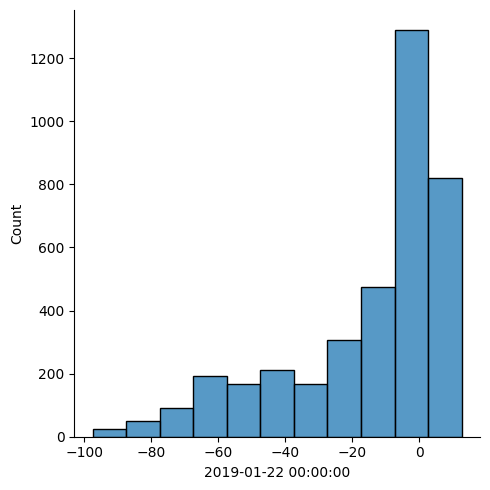

In [137]:
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [138]:
dtemp
buckets = [0] * 120
import math
#math.modf(dftest2.iloc[: , -1].values[0])
#dftest2.iloc[: , -1].values[0]
for x in range(len(dtemp.iloc[: , -1].values)-1,-1,-1):
    r,l=math.modf(dtemp.iloc[: , -1].values[x])
    if l >=0:
        l=l+100
    else:
        l=-1*l
    if buckets[int(l)]>15 and (l<63 or l>=100):
        dtemp.drop(index=dtemp.index[x], inplace=True)
    else:
        buckets[int(l)]+=1

In [139]:
dtemp2=dftest2

In [140]:
dtemp

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-119.9109 35.7051          0.0    -7.28270    1.762300    3.404200   
          36.2712          0.0    -4.77020    1.830600    4.247100   
          36.4713          0.0    -4.96970    0.219390    1.212800   
-119.9029 36.1752          0.0    -5.51700    1.331400    2.807600   
-119.8989 36.2272          0.0    -4.84400    1.351700    3.420400   
...                        ...         ...         ...         ...   
-119.6029 36.4813          0.0    -2.68260    0.449070    1.079200   
-119.6009 35.7351          0.0    -5.68580    1.065800    1.300300   
          36.2492          0.0    -2.69520    1.129600    0.090393   
          36.4493          0.0    -2.60150    0.410580    0.833170   
          36.5653          0.0    -0.56296    0.013307    0.570070   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-119.9109 35.7051    -0.126040     4.74920    1.640200    2.496200   
          36.2712     0.381440     3.68140   -0.962360   -1.983100   
          36.4713    -1.688600     1.78180   -2.299900   -1.739200   
-119.9029 36.1752    -2.012400     2.04560   -2.386400   -3.475100   
-119.8989 36.2272    -1.247700     2.15830   -2.497100   -3.446500   
...                        ...         ...         ...         ...   
-119.6029 36.4813    -0.229720     0.49846   -0.589950   -0.188730   
-119.6009 35.7351    -1.080200     2.10690   -0.094301    0.023205   
          36.2492    -3.586700    -3.89010   -6.906900   -8.928600   
          36.4493    -0.622240     0.42892   -0.920640   -0.573110   
          36.5653    -0.028894     0.50740    0.121650    0.572380   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-119.9109 35.7051     0.987220     2.43380  ...      6.3983      7.6670   
          36.2712    -2.409600    -5.57870  ...    -18.8810    -16.5880   
          36.4713    -0.630970    -4.59800  ...    -21.7070    -19.2380   
-119.9029 36.1752    -4.638100    -6.20800  ...    -24.8370    -23.2210   
-119.8989 36.2272    -4.901400    -7.90820  ...    -26.3030    -24.3940   
...                        ...         ...  ...         ...         ...   
-119.6029 36.4813     0.270800    -0.12873  ...     -5.0242     -4.5236   
-119.6009 35.7351    -1.956400    -0.90256  ...    -11.1730    -11.1900   
          36.2492   -12.299000   -16.22500  ...    -67.8140    -66.7860   
          36.4493     0.005026    -0.42261  ...     -5.0031     -4.2826   
          36.5653     0.649680     0.49871  ...      2.8162      2.9257   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-119.9109 35.7051       6.3083      7.0895      6.8489      4.2806   
          36.2712     -18.6060    -17.8420    -20.7200    -19.5980   
          36.4713     -20.9850    -20.9250    -23.1000    -22.6140   
-119.9029 36.1752     -24.6330    -24.2790    -26.7980    -25.6970   
-119.8989 36.2272     -26.1640    -25.4970    -27.9550    -26.8460   
...                        ...         ...         ...         ...   
-119.6029 36.4813      -4.6494     -4.7749     -5.2298     -4.6893   
-119.6009 35.7351     -11.0550    -10.2300    -10.8780    -11.7040   
          36.2492     -67.0720    -66.5600    -67.7720    -67.1850   
          36.4493      -4.7546     -4.6601     -5.2180     -4.6339   
          36.5653       2.8460      2.6024      2.8074      2.3517   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-119.9109 35.7051       6.7730      8.2182      7.3445      8.6782  
          36.2712     -17.7740    -17.3060    -17.8360    -16.3050  
          36.4713     -21.8350    -

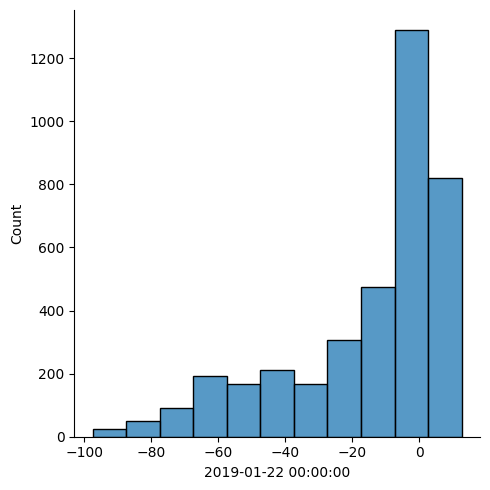

In [141]:
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [142]:
dftest2.iloc[: , -1].values

array([4.2852, 5.3531, 4.8284, ..., 5.1107, 2.8795, 7.1979])

In [143]:
# buckets = [0] * 100
# import math
# dftest=dftest2.copy()

# #math.modf(dftest2.iloc[: , -1].values[0])
# #dftest2.iloc[: , -1].values[0]
# for x in range(len(dftest2.iloc[: , -1].values)-1,-1,-1):
#     r,l=math.modf(dftest2.iloc[: , -1].values[x])   
#     if buckets[int(l)]>1:
#         dftest2.drop(index=dftest2.index[x], inplace=True)
#     else:
#         buckets[int(l)]+=1
#         dftest.drop(index=dftest.index[x], inplace=True)

In [144]:
dftest2

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.0988 35.6491          0.0    -8.12860    1.596200     2.20610   
          35.8171          0.0    -7.44130    1.611600     2.86700   
          35.9332          0.0    -6.84590    1.622100     2.63640   
          36.1012          0.0    -6.03120    1.666400     3.78230   
-120.0968 35.9852          0.0    -6.84490    1.344800     3.24930   
...                        ...         ...         ...         ...   
-118.9351 35.9912          0.0     1.31960   -0.454550    -1.12980   
-118.9331 35.8431          0.0    -0.27523    0.340730     0.11561   
-118.9311 35.6111          0.0    -2.60280    0.000017     0.94402   
          36.0432          0.0     1.67880   -0.808910    -1.57380   
-118.9271 35.7791          0.0    -0.74982    0.704870     0.91393   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.0988 35.6491     -1.02220      2.8665   -0.518000     1.43890   
          35.8171     -0.63183      4.0240    0.345960     2.38370   
          35.9332     -0.67816      4.3306    0.549880     2.15820   
          36.1012     -0.79018      4.0454    0.072619    -0.48999   
-120.0968 35.9852     -0.42671      4.4830    1.098100     1.90060   
...                        ...         ...         ...         ...   
-118.9351 35.9912     -2.19600     -2.2949    0.732390    -2.64910   
-118.9331 35.8431     -1.89770     -1.7240    1.244300    -2.65080   
-118.9311 35.6111     -2.10420     -1.8717    0.510950    -2.71470   
          36.0432     -1.46080     -2.8152    0.054982    -2.94200   
-118.9271 35.7791     -2.01520     -1.4199    1.315100    -2.26120   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.0988 35.6491     -0.11570    2.294800  ...      1.9885      3.5825   
          35.8171      0.66564    2.423800  ...      3.0516      4.8731   
          35.9332      0.98423    2.142100  ...      3.0299      4.8895   
          36.1012     -0.17051   -1.213200  ...     -7.1565     -4.7987   
-120.0968 35.9852      1.26060    1.822800  ...      3.2647      5.2447   
...                        ...         ...  ...         ...         ...   
-118.9351 35.9912     -0.57953   -0.463840  ...      3.3119      2.4877   
-118.9331 35.8431      0.44136    0.072182  ...      5.3406      4.6145   
-118.9311 35.6111      0.42639    0.334300  ...      4.6175      4.2846   
          36.0432     -1.33580   -1.282900  ...      2.8628      1.8351   
-118.9271 35.7791      0.90483    0.531310  ...      6.6669      6.1738   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.0988 35.6491       2.0509      2.8094      1.7238   -0.171410   
          35.8171       3.1897      4.3736      2.6908    0.041718   
          35.9332       3.2825      4.5129      2.6161    0.220740   
          36.1012      -6.5900     -5.6185     -8.0356   -8.517900   
-120.0968 35.9852       3.6587      4.7573      2.1463    1.406500   
...                        ...         ...         ...         ...   
-118.9351 35.9912       3.7906      3.6429      3.8131    2.701500   
-118.9331 35.8431       5.8431      5.6430      5.8181    5.778600   
-118.9311 35.6111       5.3261      5.0863      5.6278    4.180500   
          36.0432       3.5058      3.3816      3.2020    2.793300   
-118.9271 35.7791       7.0694      7.0594      7.1988    6.934600   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.0988 35.6491       2.2600      3.9413      3.1153      4.2852  
          35.8171       3.0582      4.9273      3.9057      5.3531  
          35.9332       3.1338     

In [145]:
dtemp.to_csv('E:/DSFellowship/InSAR_data_south/displacement/testset170.csv')